# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semanas 3 y 4

**Rotación de Personal - IBM**

#### **Nombres y matrículas:**

###**Maria Celeste Vela Jimenez A01632804**
###**Jose Guadalupe González Núñez A01795755**




#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [2]:
# Incluye aquí todas las librerías que consideres necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as make_pipeline_imb

from scipy import stats




# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++

El problema de rotación de personal en las organizaciones tiene un costo muy alto para estas, el motivo es que es necesario invertir recursos para atraer nuevo talento de reemplazo, ademas de capacitarlo, y posteriormente colocarlo en la posicion deseada, si el problema persiste este ciclo continua, causando pérdidas economicas para la empresa en cuestion. Ademas que esta constante rotacion, causa que la calidad del proceso disminiya, en el caso de los productos estos pueden ser defectuosos, inefectivos, en casos extremos peligrosos. En el caso de los servicios estos seran deficientes, poco confiables y que no alcanzan los estandares de la industria en la que se encuentran. Así, un problema de rotacion de personal puede ocasionar un efecto domino que elimine a la empresa del mercado.



++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**


```

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [3]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Employee_Attrition_Performance.csv")
df
# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Mounted at /content/drive
Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0



*   **Sin include="all":** El método describe proporcionará un resumen estadístico solo para las columnas numéricas del DataFrame, excluyendo las columnas cuyo tipo de datos no sea numérico. Esto significa que solo se mostrarán estadísticas descriptivas como el recuento, la media, la desviación estándar, los valores mínimos, los percentiles y los valores máximos para las columnas numéricas.

*   **Con include="all":** Al usar este argumento, el método describe incluirá un resumen estadístico para todas las columnas del DataFrame, tanto para las columnas numéricas como para las columnas no numéricas. Esto significa que se mostrarán estadísticas descriptivas para todas las columnas, incluyendo las no numéricas, como el conteo de valores no nulos, el número de valores únicos, el valor más frecuente y la frecuencia del valor más frecuente.


# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

*a)   Over18*: Solo existe 1 data unico, lo que significa que todos son mayores de 18 años. Por lo tanto, no aporta información útil ya que no cuenta con variabilidad.

*b)	EmployeeCount*:
Esta columna no representa contener ninguna variabilidad debido a que solo nos dice el valor total de numero de empleados en la empresa

*c)	StandardHours*:
No agrega informacion valiosa para la rotacion de personal, debido a que es una variable que tiene el mismo valor para todas los empleados y se debe porque son las horas trabajadas por estos mimos

*d)	EmployeeNumber*:
Es un identificador o matricula que se le asigna a cada empleado individualmente por lo que no representa una variable valiosa para nuestro analisis
++++++++ Termina la sección de agregar texto. +++++++++++




In [27]:
# Eliminamos los factores indicados:
#print(df.columns)
df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

****************
Numerical columns
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************
****************
Floating point
Index([], dtype='object')
****************
****************
booleans
Index([], dtype='object')
****************
****************
Categorical
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
****************
               count unique                     top  freq
Attrition       1470      2        

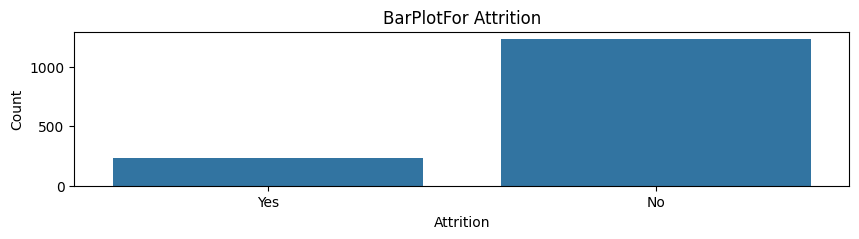

Distinct values for Attrition
['Yes' 'No']
Total of unique values 2


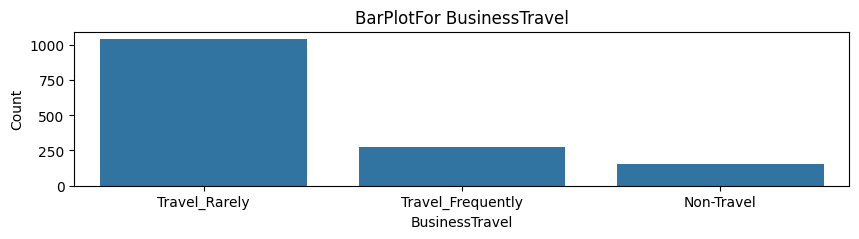

Distinct values for BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Total of unique values 3


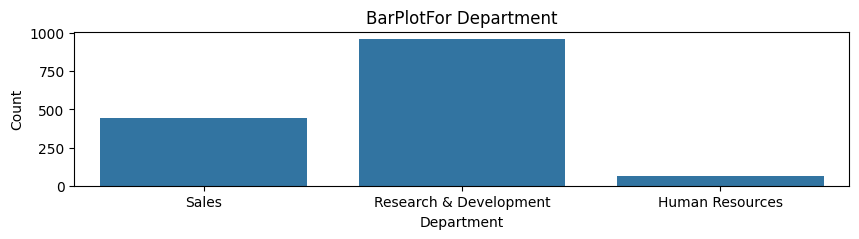

Distinct values for Department
['Sales' 'Research & Development' 'Human Resources']
Total of unique values 3


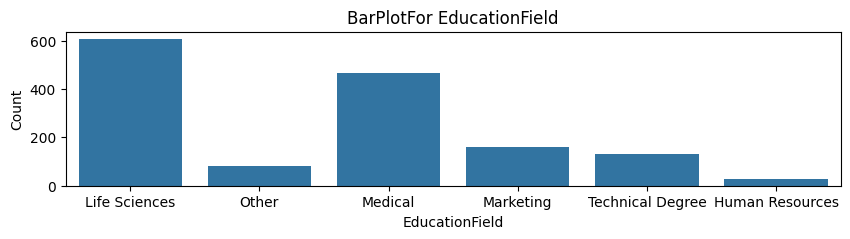

Distinct values for EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Total of unique values 6


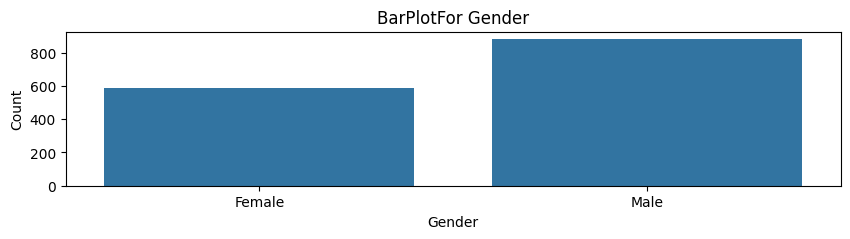

Distinct values for Gender
['Female' 'Male']
Total of unique values 2


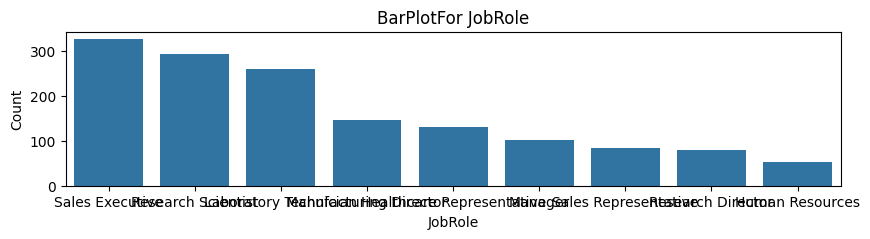

Distinct values for JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Total of unique values 9


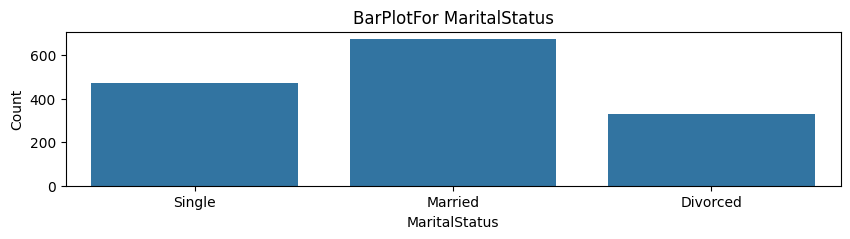

Distinct values for MaritalStatus
['Single' 'Married' 'Divorced']
Total of unique values 3


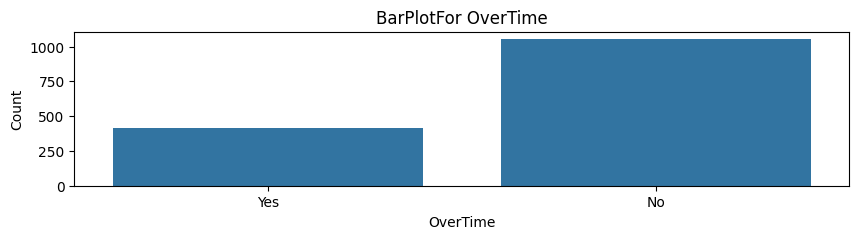

Distinct values for OverTime
['Yes' 'No']
Total of unique values 2


In [28]:
# Incluye en esta celda el código que consideres necesario para responder
# las preguntas del Ejercicio 5:
#print(df.head())
numerics = df.select_dtypes(include=np.int64)
print('****************')
print('Numerical columns')
print(numerics.columns)
print('****************')
floating = df.select_dtypes(include=np.float32)
print('****************')
print('Floating point')
print(floating.columns)
print('****************')
boolean = df.select_dtypes(include='bool')
print('****************')
print('booleans')
print(boolean.columns)
print('****************')
categorical = df.select_dtypes(include=['object','category'])
print('****************')
print('Categorical')
print(categorical.columns)
print('****************')
print(df.describe(include=['object','category']).T)

for c in categorical:
  plt.figure(figsize=(10,2))
  sns.countplot(x=c,data=df)
  plt.title(f'BarPlotFor {c}')
  plt.ylabel('Count')
  plt.show()
  print(f'Distinct values for {c}')
  unique = df[c].unique()
  print(unique)
  print(f'Total of unique values {len(unique)}')


#### **Realiza los análisis necesarios para encontrar cuántas y cuáles de las variables del nuevo DataFrame son:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

i.	variables numéricas de valor entero:

'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
       
ii.	variables numéricas de valor real (flotante):

Ninguna

iii.	variables binarias:

Overtime,Attrition

iv.	variables categóricas nominales. Indica el total de niveles que tiene cada una de estas variables:

 'BusinessTravel' 3, 'Department' 3, 'EducationField' 6,  'Gender' 2,'JobRole' 9, 'MaritalStatus' 3

v.	variables categóricas ordinales. Indica el total de niveles que tiene cada una de estas variables:
Ninguna

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 6:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [29]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++
def stratified_split(df, feature_cols, label_col, train_size, valid_size, test_size):
  #Primero usamos train_test_split
  #Para generar el conjunto de prueba test_df
  #Y el conjunto de entrenamiento y validacion train_valid_df
    train_valid_df, test_df = train_test_split(df, test_size=test_size,
                                               stratify=df[label_col], random_state=42)
    #Se ajusta el tamaño que en este segundo split en realidad representa el set de validacion
    valid_size_adjusted = valid_size / (1 - test_size)
    train_df, valid_df = train_test_split(train_valid_df, test_size=valid_size_adjusted,
                                          stratify=train_valid_df[label_col], random_state=42)
    X_train = train_df[feature_cols]
    y_train = train_df[label_col]
    X_val = valid_df[feature_cols]
    y_val = valid_df[label_col]
    X_test = test_df[feature_cols]
    y_test = test_df[label_col]

    return X_train, X_val, X_test, y_train, y_val, y_test
features = df.drop('Attrition',axis=1)
#attrition = df.Attrition
print(features.columns)
#print(attrition.columns)
XTrain,XVal,Xtest,ytrain,yval,ytest = stratified_split(df,features.columns,'Attrition',.7,.15,.15)
# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# **Ejercicio 7:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las variables deberán seguir llamándose igual: ytrain, yval, ytest. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

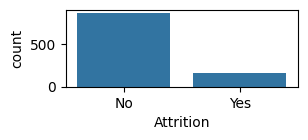

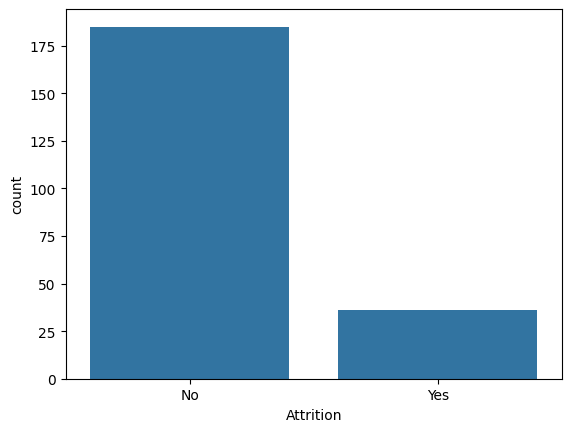

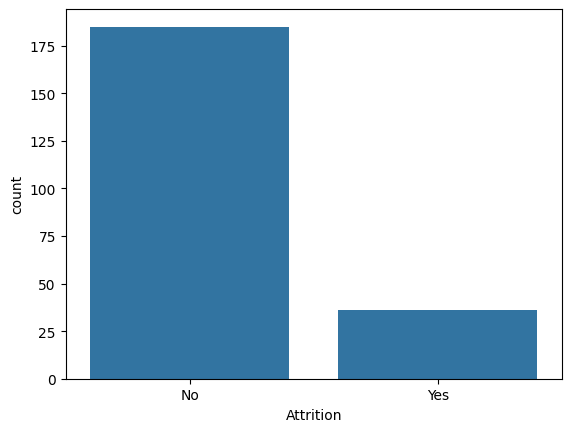

['No' 'Yes']


In [30]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
labelEncoder = LabelEncoder()
plt.figure(figsize=(3,1))
sns.countplot(x=ytrain)
plt.show()
sns.countplot(x=ytest)
plt.show()
sns.countplot(x=yval)
plt.show()
ytrain = labelEncoder.fit_transform(ytrain)
yval = labelEncoder.transform(yval)
ytest = labelEncoder.transform(ytest)
print(labelEncoder.classes_)

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 8:**


#### **Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

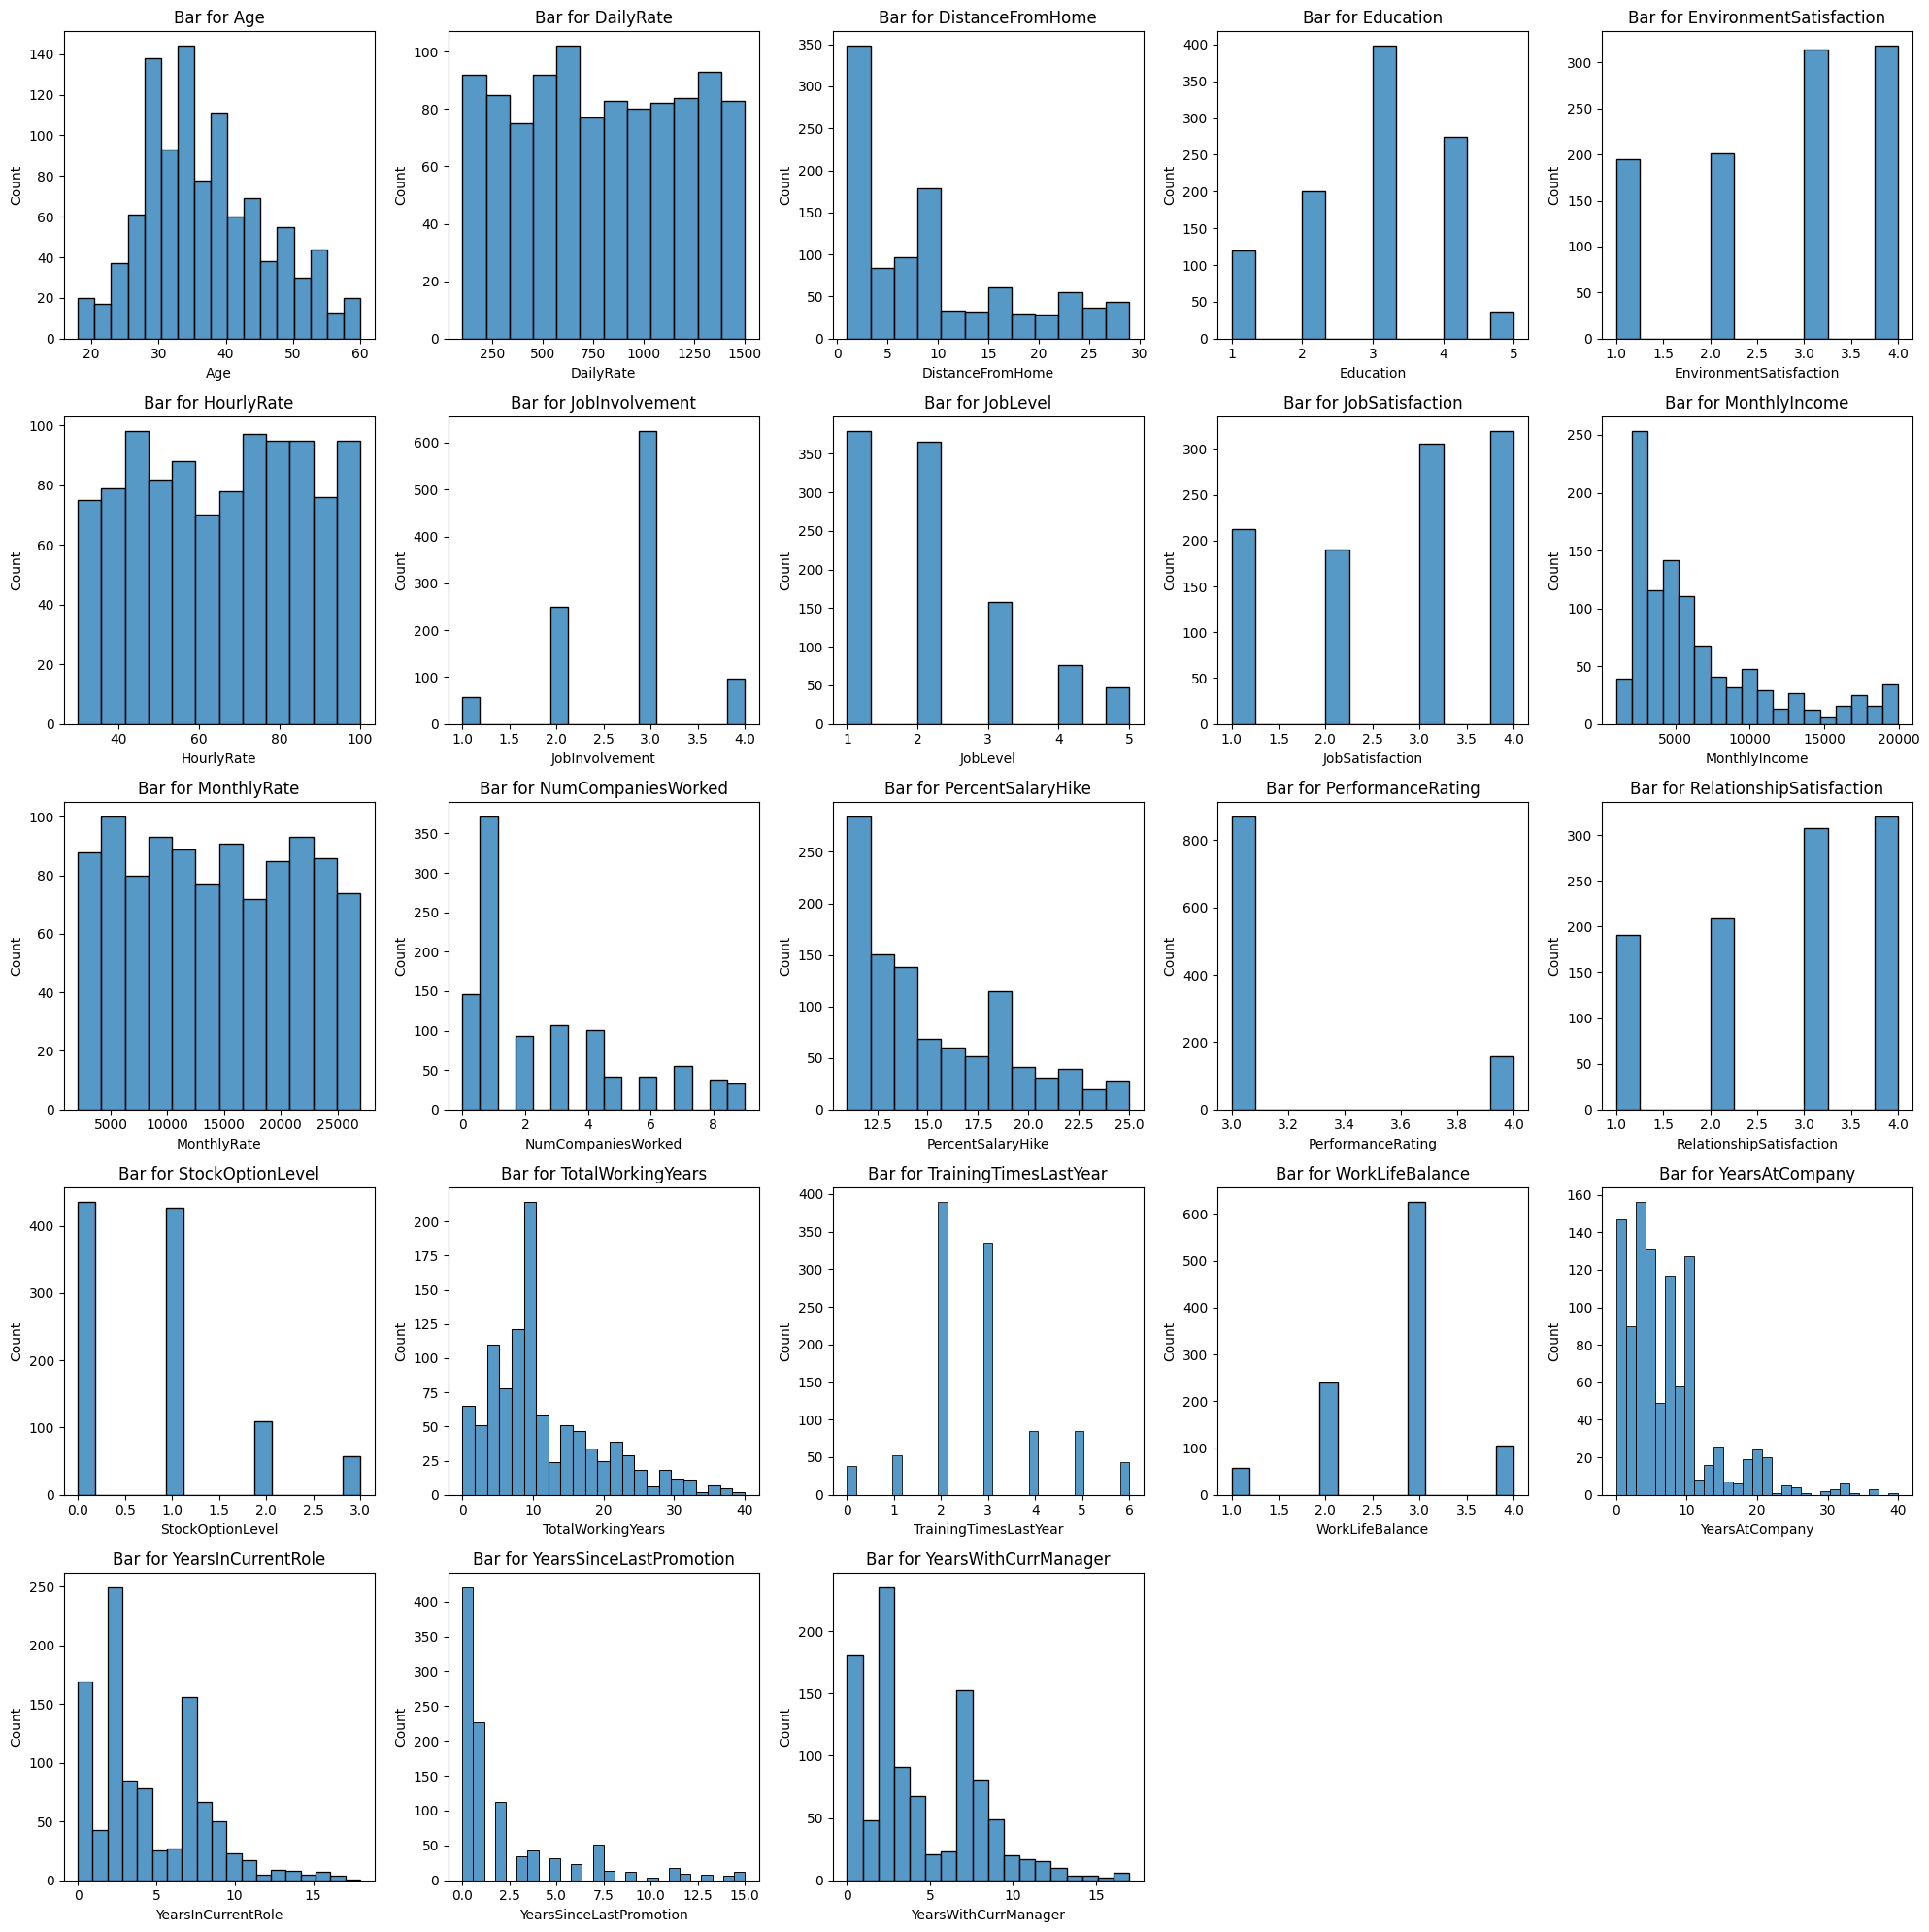

In [31]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
numericals = XTrain.select_dtypes(include=np.int64)
plt.figure(figsize=(20,20))
rows,cols = 5,5
for index,col in enumerate(numericals):
  plt.subplot(rows,cols,index+1)
  sns.histplot(x=col,data=numericals)
  plt.title(f'Bar for {col}')
  plt.ylabel('Count')
plt.tight_layout()
plt.show()
#print(numericals.columns)
#Along this data seems to be candidates to become categorical ordinal
#So it may be treated with othe transformations, more appropiate
#Log for Montlyincome,TotalWorkingYears,YearsAtCompany
#Normalization and scaling for all numericals.

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# **Ejercicio 9:**

#### **Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. En particular, deberás ilustrar gráficamente la relación entre las siguientes variables, las cuales pueden aportar información al problema que estamos enfrentando de rotación de personal.**

a)	Las variables “Age” y “Attrition”.

b)	Las variables “Department” y “Attrition”.

c)	Las variables “Gender” y “Attrition”.

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


<Axes: xlabel='Age', ylabel='Attrition'>

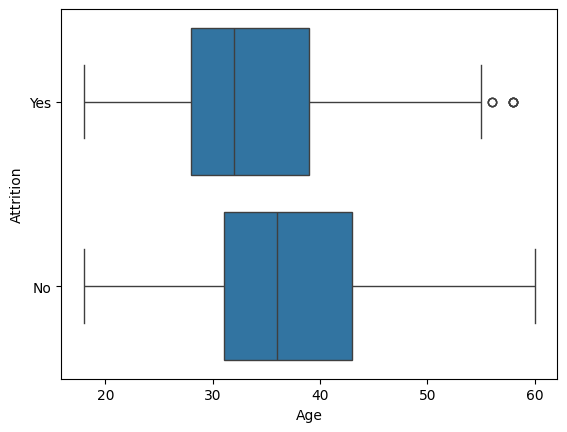

In [32]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

#att_age = att.corr(df['Age'])
#print(f'Correlation between Age and Attrition {att_age}')
sns.boxplot(data=df,x=df['Age'],y=df['Attrition'])


<Axes: xlabel='Department', ylabel='Attrition'>

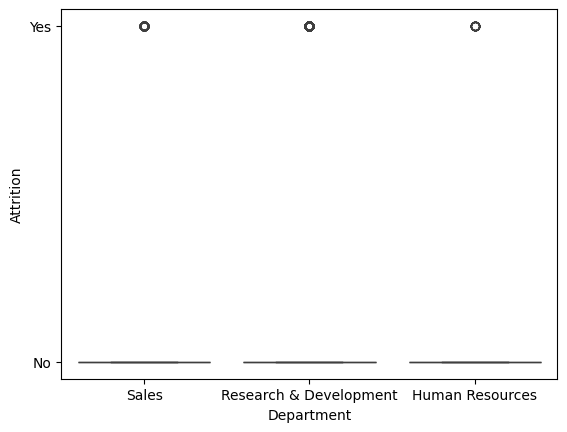

In [33]:
sns.boxplot(data=df,x=df['Department'],y=df['Attrition'])


<Axes: xlabel='Gender', ylabel='Attrition'>

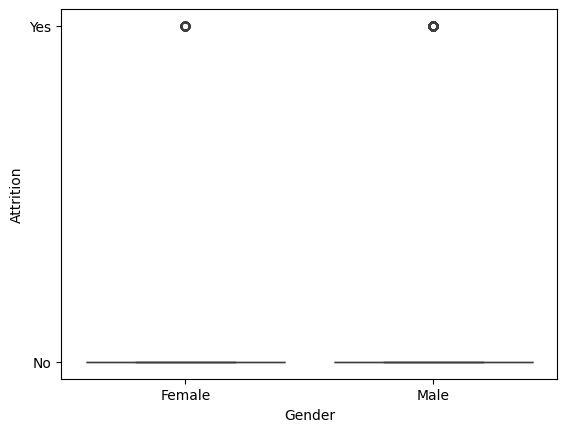

In [34]:
sns.boxplot(data=df,x=df['Gender'],y=df['Attrition'])

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Attrition'>

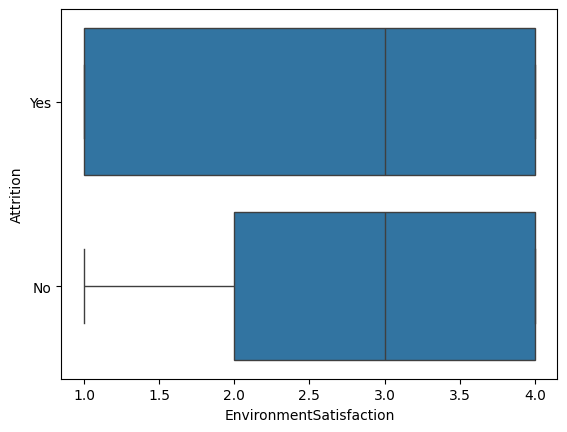

In [35]:
''' positions = range(1,len(['EnvironmentSatisfaction','Attrition'])+1)
df_copy = df.copy()
plt.figure(figsize=(10,6))
for i,col in enumerate(['EnvironmentSatisfaction','Attrition'])
  plt.boxplot(df_copy[col].dropna(),positions=[positions[i]])

#sns.boxplot(data=df,x=df['EnvironmentSatisfaction'],y=df['Attrition'])
plt.xticks(positions,['EnvironmentSatisfaction','Attrition'])
plt.title() '''

sns.boxplot(data=df,x=df['EnvironmentSatisfaction'],y=df['Attrition'])

# **Ejercicio 10:**

#### **Encontrar la matriz de correlación de Pearson entre variables numéricas y a partir de dicha matriz encuentra aquellas correlaciones fuertes, positivas o negativas.**

**NOTA: Decimos que una correlación es fuerte cuando el valor absoluto es mayor a 0.7.**


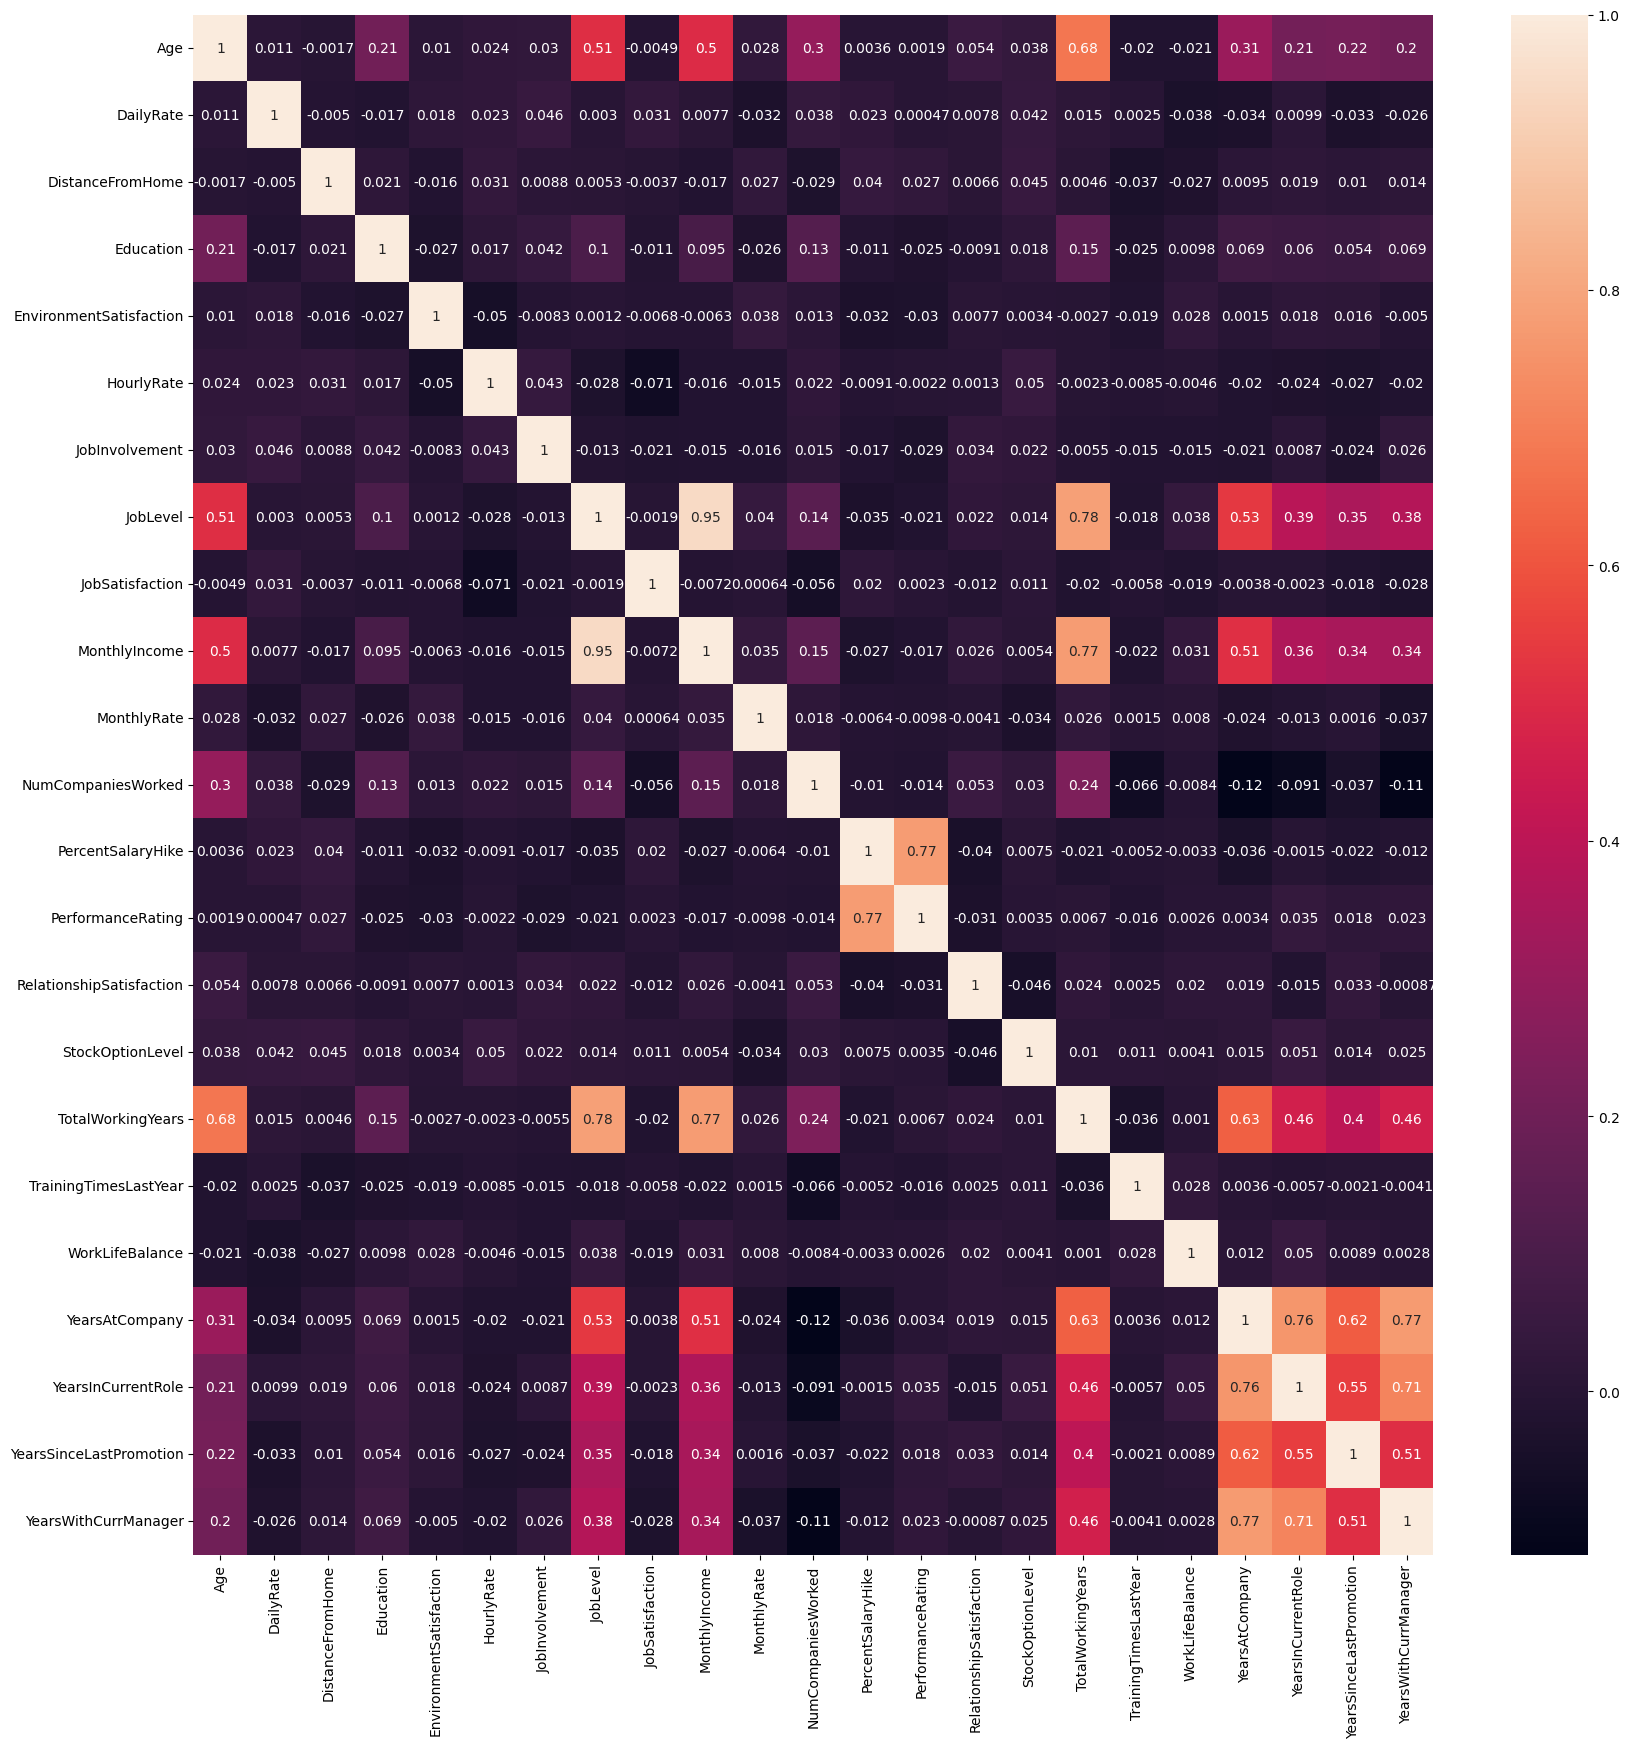

In [36]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
numericals = df.select_dtypes(include={np.int64})
plt.figure(figsize=(20,20))
sns.heatmap(numericals.corr(),annot=True)
plt.show()

**Correlaciones importantes positivas:**

YearsAtCompany vs YearsWithCurrManager

YearsInCurrentRole vs YearsWithCurrManager

YearsAtCompany vs YearsinCurrentRole

MontlyIncome vs TotalWorkingYears

JobLevel vs TotalWorkingYears

JobLevel vs MontlyIncome


# **Ejercicio 11:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**

**NOTA: A las variables numéricas aplica las transformaciones que hayas decidido en el Ejercicio 8; a las variables binarias y nominales puedes aplicarles las transformaciones One-Hot-Encoder; a las variables ordinales puedes aplicar la transformación OrdinalEncoder.**


In [37]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# NUMÉRICAS:
skewed_names = ['DistanceFromHome','MonthlyIncome',
                'NumCompaniesWorked','PercentSalaryHike',
                'TotalWorkingYears','YearsAtCompany',
                'YearsInCurrentRole','YearsSinceLastPromotion',
                'YearsWithCurrManager']
log_transformer = FunctionTransformer(np.log1p,validate=True)
numericas_pipeline_nombres = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
column_transformer = ColumnTransformer(
    transformers=[
        ('log',log_transformer,skewed_names),
        ('scale', StandardScaler(), numericas_pipeline_nombres)
    ],
    remainder='passthrough'
)

numericas_pipeline = Pipeline( steps=[("preprocessing",column_transformer)] )

# BINARIAS Y NOMINALES:

catOHE_pipeline_nombres = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']
column_transformer2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), catOHE_pipeline_nombres)
    ],
    remainder='passthrough'
)

catOHE_pipeline = Pipeline( steps= [
    ("preprocessing2",column_transformer2)
])

# ORDINALES:
catOrd_pipeline = Pipeline( None )
catOrd_pipeline_nombres = None


columnasTransformer = ColumnTransformer( transformers=[
        ('log',log_transformer,skewed_names),
        ('scale', StandardScaler(), numericas_pipeline_nombres),
        ('onehot', OneHotEncoder(), catOHE_pipeline_nombres)
    ],
    remainder='passthrough' )

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 12:**

#### **12)	Utilizando los conjuntos de entrenamiento y validación, encuentra los mejores hiperparámetros del modelo LogisticRegresion de Sklearn para obtener un modelo no sobre entrenado.**

**NOTA: Por el momento diremos que un modelo de clasificación no está sobreentrenado, si la diferencia de la exactitud (Accuracy) entre el conjunto de entrenamiento y el de validación es menor al 3%.**


In [38]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

modeloRL = LogisticRegression()

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(XTrain, np.ravel(ytrain))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('scale', StandardScaler(...
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('modeloRL', LogisticRegression())])

In [39]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(XTrain)
y_pred_valRL = pipelineRL.predict(XVal)
print('accuracy-train', accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(classification_report(yval, y_pred_valRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.9134241245136187
accuracy-val 0.8868778280542986

>>Matriz de Confusión:
[[175  10]
 [ 15  21]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       185
           1       0.68      0.58      0.63        36

    accuracy                           0.89       221
   macro avg       0.80      0.76      0.78       221
weighted avg       0.88      0.89      0.88       221



# **Ejercicio 13:**

#### **Con base a la información del desempeño obtenido en el ejercicio anterior para los conjuntos de entrenamiento y validación, contesta los siguientes incisos:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

a)	¿Podemos decir que el modelo está subentrenado (underfitting) o sobreentrenado (overfitting)?

El modelo parece ser capaz de generalizar bien en los sets de entrenamiento y en los sets de validacion. Sin embargo en el codigo provisto no se contempla el set de prueba. No parece tener underfitting ya que captura correctamente el patron embebido en los datos.

b)	Interpreta el valor numérico obtenido para la “precision” de la clase positiva.
El 0.68 significa que el modelo reconoce en el 68% de los casos de forma correcta a las personas que abandonaran la empresa. El resto son errores.

c)	Interpreta el valor numérico obtenido para el “recall” de la clase positiva.

Este valor numerico responde a la pregunta, de todas las instancias verdaderamente positivas, cuantas el modelo reconocio correctamente.
Para la clase 0 95% y para la clase 1 58 %


d)	Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.

Mejoraria el recall y precision de la clase 1, porque es importante para una impresa de mayor valor identificar correctamente a los empleados que se marcharan que a los empleados que se quedaran.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 14:**

#### **Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los k Vecinos más Cercanos, kNN, usando la función KNeighborsClassifier() de Sklearn. Compara los resultados con el modelo de regresión logística e incluye tus conclusiones.**

In [43]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

knn = Pipeline(steps=[
    ('preprocessing',columnasTransformer),
    ('classifier',KNeighborsClassifier(n_neighbors=3))
])

param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11],
              'classifier__weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(XTrain, ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)




Best parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best cross-validated score: 0.8541084537058963


In [42]:
print(knn.score(XTrain,ytrain))
print(knn.score(Xtest,ytest))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

En terminos de score parece tener un desempeño aceptable en los los conjuntos de prueba y validacion. Lo que es indicativo de una capacidad aceptable de generalizacion.


# **Ejercicio 15:**

#### **Utilizando el mejor modelo obtenido previamente (regresión logística o kNN), utiliza algún método de submuestreo (undersampling) o sobremuestreo (oversampling) que consideres adecuado de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados, para obtener el mejor modelo posible.**

**NOTA: Ver la documentación correspondiente:** https://imbalanced-learn.org/stable/references/


In [44]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
nearmiss_pipe = make_pipeline_imb(
    columnasTransformer,
    NearMiss(version=1),
    KNeighborsClassifier(n_neighbors=11,weights="uniform")
)

nearmiss_pipe.fit(XTrain,ytrain)

y_pred = nearmiss_pipe.predict(XVal)
print("Accuracy:", accuracy_score(yval, y_pred))
print("Confusion Matrix:\n", confusion_matrix(yval, y_pred))
print("Classification Report:\n", classification_report(yval, y_pred))

Accuracy: 0.7828054298642534
Confusion Matrix:
 [[158  27]
 [ 21  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       185
           1       0.36      0.42      0.38        36

    accuracy                           0.78       221
   macro avg       0.62      0.64      0.63       221
weighted avg       0.80      0.78      0.79       221



In [45]:
y_pred = nearmiss_pipe.predict(XTrain)
print("Accuracy train:", accuracy_score(ytrain, y_pred))
print("Confusion Matrix train:\n", confusion_matrix(ytrain, y_pred))
print("Classification Report train:\n", classification_report(ytrain, y_pred))

Accuracy train: 0.754863813229572
Confusion Matrix train:
 [[712 151]
 [101  64]]
Classification Report train:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       863
           1       0.30      0.39      0.34       165

    accuracy                           0.75      1028
   macro avg       0.59      0.61      0.59      1028
weighted avg       0.78      0.75      0.77      1028



++++++++ Inicia la sección de agregar texto: ++++++++++++

#### **Con dicho modelo:**

**a)	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**
Accuracy validation: 0.7828054298642534
Accuracy train: 0.754863813229572

**b)	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

Confusion Matrix:

 [[158  27]

 [ 21  15]]

**c)	¿Qué métrica es la que consideras que explica mejor el buen desempeño de nuestro modelo?**
f1-score

**d)	Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

La regresion logistica aunque imperfecta, parece ofrecer un mejor rendimiento para este problema en particular, aunque esto puede deberse a una multitud de factores, en lo particular la inexperiencia del ingeniero a cargo.



++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 16:**

#### **Con base al mejor modelo que hayas obtenido hasta ahora, aplica la técnica de permutación de los factores con el método “permutation_importance()” de Sklearn, para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**

None

**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**

Horas extra,tiempo de trabajo total, años en la empresa, satisfaccion con el ambiente laboral

++++++++ Termina la sección de agregar texto: ++++++++++++


In [48]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
features = df.columns.values.tolist()Y
for f in ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']:
  features.remove(f)
print(features)
print(len(features))
permutation_ = permutation_importance(pipelineRL,XTrain,ytrain,n_repeats=10,random_state=0)
importance = permutation_.importances_mean
fig = sns.barplot(x=features,y=permutation_.importances_mean)
plt.xlabel("features")
plt.ylabel("importance")
plt.title("Feature vs importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(fig)

SyntaxError: invalid syntax (<ipython-input-48-b11e3e7dc446>, line 3)

# **Ejercicio 17:**

#### **Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal. Forma un nuevo conjunto de Entrenamiento con los conjuntos de entrenamiento y validación y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo, desplegando la siguiente información:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**

None

**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

None

++++++++ Termina la sección de agregar texto: ++++++++++++

In [53]:
# Convertir las matrices a DataFrames
ytrain_df = pd.DataFrame(ytrain, columns=['Attrition'])
yval_df = pd.DataFrame(yval, columns=['Attrition'])

# Combina conjuntos de entrenamiento y validación
X_train_combined = pd.concat([XTrain, XVal])
y_train_combined = pd.concat([ytrain_df, yval_df])



In [55]:

# Entrena el mejor modelo con el nuevo conjunto de entrenamiento
pipelineRL.fit(X_train_combined, np.ravel(y_train_combined))

# Evalúa el modelo con el conjunto de prueba
y_pred_test = pipelineRL.predict(Xtest)

# Despliega la matriz de confusión y el reporte de clasificación del conjunto de prueba
print("\n>>Matriz de Confusión del Conjunto de Prueba:")
print(confusion_matrix(ytest, y_pred_test))

print("\n>>Reporte de Clasificación del Conjunto de Prueba:")
print(classification_report(ytest, y_pred_test))



>>Matriz de Confusión del Conjunto de Prueba:
[[180   5]
 [ 23  13]]

>>Reporte de Clasificación del Conjunto de Prueba:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       185
           1       0.72      0.36      0.48        36

    accuracy                           0.87       221
   macro avg       0.80      0.67      0.70       221
weighted avg       0.86      0.87      0.86       221



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision:
Para la clase 0 (no rotación de personal): 0.89
Para la clase 1 (rotación de personal): 0.72
La precisión representa la proporción de predicciones correctas de una clase con respecto a todas las predicciones de esa clase.

**En este contexto, la precisión para la clase 0 indica que el 89% de las predicciones de no rotación de personal fueron correctas, mientras que para la clase 1, el 72% de las predicciones de rotación de personal fueron correctas.**

Recall:
Para la clase 0: 0.97
Para la clase 1: 0.36
El recall, también conocido como sensibilidad o tasa positiva verdadera, representa la proporción de instancias relevantes que fueron correctamente identificadas.

**Un recall alto para la clase 0 (0.97) indica que se identificaron correctamente la mayoría de las instancias de no rotación de personal. Sin embargo, el recall para la clase 1 (0.36) es bajo, lo que indica que no se identificaron muchas instancias de rotación de personal.**

F1-score:
Para la clase 0: 0.93
Para la clase 1: 0.48
El F1-score es una medida que combina la precisión y el recall en una única métrica. Es especialmente útil cuando las clases están desequilibradas, como en este caso. Un F1-score alto indica un buen equilibrio entre precisión y recall.


**La clase 0 tiene un F1-score alto (0.93), lo que sugiere un buen rendimiento en la predicción de no rotación de personal. Sin embargo, el F1-score para la clase 1 es más bajo (0.48), lo que indica que la predicción de rotación de personal no es tan efectiva como la de no rotación.**

**En resumen,** los resultados indican que el modelo tiene un buen desempeño al predecir la no rotación de personal (clase 0), con altas precisiones, recalls y F1-scores. Sin embargo, su rendimiento en la predicción de rotación de personal (clase 1) es menos satisfactorio, con una precisión y un recall más bajos. Esto podría indicar que el modelo necesita mejorar su capacidad para detectar correctamente los casos de rotación de personal, posiblemente a través de un ajuste en las características utilizadas o mediante técnicas de manejo de datos desequilibrados.








# >> **Fin de la Actividad de las Semanas 3 y 4** <<